Começamos fazendo as importações necessárias para o trabalho.

In [1]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import grad

## Perceptron parameters and perceptron definition

displacement field definition

   **u(x)=wx+b**

linear transormation defined by torch.nn.Linear(1,1)

   **y=xW^T+b**

**w** representa o coeficiente angular (inclinação) de um deslocamento linear.

**b** representa o valor de deslocamento inicial (intercepto).

O modelo **torch.nn.Linear(1, 1)** representa uma rede neural com 1 entrada e 1 saída, isto é, uma função linear do tipo: u(x)=w⋅x+b


In [2]:
w = 200.0E-6
b = 1.0
model = torch.nn.Linear(1, 1)  # input dimension, output dimension

Sobrescrevemos os pesos e bias iniciais da rede neural com valores específicos (w e b) para que o modelo represente exatamente a função desejada. Dessa forma, não há aprendizado envolvido — estamos apenas utilizando a estrutura da rede para modelagem simbólica.

In [3]:
#overwrite random weights initially assigned
model.weight.data = torch.tensor([[w]])
model.weight.bias = torch.tensor([b])

## Spatial grid creation

Criamos 5 pontos igualmente espaçados entre -1 e 1. O método **.unsqueeze(1)** transforma o vetor x de shape (5,) para (5, 1), compatível com a entrada da rede.

O argumento **requires_grad=True** permite que o PyTorch acompanhe as operações sobre x para cálculo de gradientes automáticos.

In [4]:
nx = 5
x = torch.linspace(-1, 1, nx, requires_grad=True).unsqueeze(1)

# Sample displacement field at points on x vector

**d:** deslocamento da barra, dado por u(x)=wx+b

# Gradient computation of modeled displacement field

**dd_dx:** derivada de u em relação a x, que representa a deformação ε= dx/du

In [5]:
d = model(x)
dd_dx = grad(d, x, torch.ones_like(x), create_graph=True, retain_graph=True)[0]

# Strain computation

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>&#x3B5;</mi>
  <mo>=</mo>
  <mi mathvariant="normal">&#x2207;</mi>
  <mi>u</mi>
</math>

In [6]:
eps = dd_dx

# Stress computation

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>&#x3C3;</mi>
  <mo>=</mo>
  <mi>E</mi>
  <mi>&#x3B5;</mi>
</math>

**sig:** tensão obtida pela lei de Hooke uniaxial: σ=E⋅ε, onde E é o módulo de Young.

In [7]:
E = 210000.0
sig = E * eps

# Visualize displacement, strain and stress across spatial grid

Criamos três gráficos lado a lado:

**Deslocamento u(x):** linha reta crescente.

**Deformação ε(x):** constante, pois a derivada de uma função linear é constante.

**Tensão σ(x):** constante também, pois é proporcional à deformação constante.

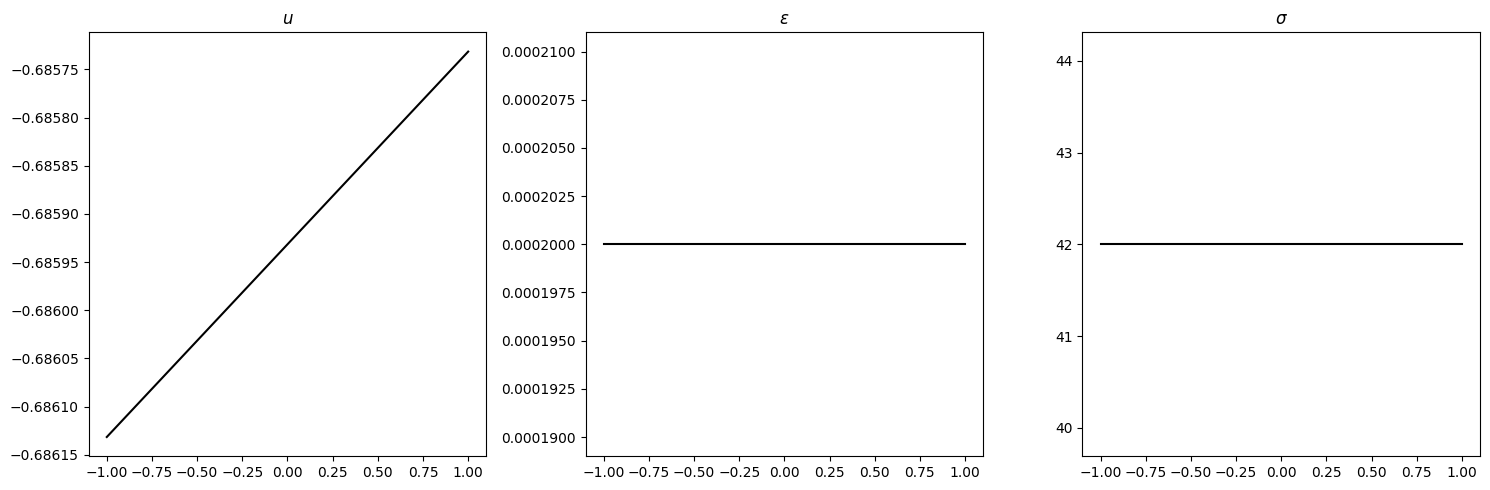

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(x.detach(), d.detach(), "k")
ax[0].set_title("$u$")
ax[1].plot(x.detach(), eps.detach(), "k")
ax[1].set_title("$\\varepsilon$")
ax[2].plot(x.detach(), sig.detach(), "k")
ax[2].set_title("$\\sigma$")
fig.tight_layout()
plt.show()